## Análisis exploratorio de datos


### Paso 1: Planteamiento del problema y recopilación de datos

En este caso queremos: 

- Entender qué variables influyen en el precio de alquiler de viviendas en Airbnb en Nueva York durante 2019.
- Identificar patrones, tendencias y relaciones entre las variables (localización, tipo de habitación, servicios, reviews, etc.) y el precio del alquiler.

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [2]:
import pandas as pd

df = pd.read_csv('../data/raw/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 2: Exploración y limpieza de datos

Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin distinción de train y test, para obtener conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas, podemos arrancar con el proceso.

Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital. Para ello necesitamos el atributo `shape` para obtener las dimensiones del objeto y la función `info()` para conocer la tipología y la cantidad de valores no nulos:

In [3]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Una vez hemos obtenido esta información, es importante que seamos capaces de extraer conclusiones, como las siguientes:

- Existen un total de 48895 filas (en este caso, personas) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, `Survived`.
- Las variables `last_review` y 'reviews_per_month' tienen valores faltantes, unos 10.000.
- Los datos cuentan con 7 características numéricas y 6 características categóricas.

#### Eliminar duplicados

Un punto muy importante a tener en cuenta en este paso es eliminar aquellas instancias que pudieran estar duplicadas en el conjunto de datos. Esto es crucial, ya que, de dejarlo, el mismo punto tendría varias representaciones, lo cual es matemáticamente incoherente e incorrecto. Para ello, hemos de ser inteligentes buscando duplicados y conocer previamente si los hay y dónde, antes de eliminarlos. Además, tenemos que tener en cuenta que una instancia puede estar repetida independientemente del identificador que pueda tener, así que en este caso nos interesa eliminar del análisis la variable `PassengerId`, ya que podría estar mal generada.

In [5]:
df.drop("id", axis=1).duplicated().sum()
df.drop("name", axis=1).duplicated().sum()
df.drop("host_id", axis=1).duplicated().sum()
df.drop("host_name", axis=1).duplicated().sum()
df.drop("last_review", axis=1).duplicated().sum()
df.drop("reviews_per_month", axis=1).duplicated().sum()




np.int64(0)

En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de `drop_duplicates()`.

In [6]:
df = df.drop_duplicates(subset = df.columns.difference(['id' , 'name' , 'host_id', 'host_name' , 'last_review', 'reviews_per_month']))
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Excluiríamos de nuevo la columna identificativa, aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis:

In [7]:
if df.duplicated().sum():
    df = df.drop_duplicates()
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Eliminar información irrelevante

Cuando queremos preparar los datos para entrenar un modelo predictivo, debemos responder a la siguiente pregunta: ¿son todas las características imprescindibles para realizar una predicción? Normalmente, esa pregunta es un rotundo no. Tenemos que tratar de ser lo más objetivos posible y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto, aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que podemos estar seguros de que el algoritmo no va a utilizar en el proceso predictivo, estas son 'id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'.

In [8]:
df.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Paso 3: Análisis de variables univariante

Una **variable univariante** es un término estadístico que se emplea para referenciar un conjunto de observaciones de un atributo. Esto es, el análisis columna a columna del DataFrame. Para ello, debemos distinguir si una variable es categórica o numérica, ya que el cuerpo del análisis y las conclusiones que se pueden obtener serán distintas.

#### Análisis sobre variables categóricas

Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc, pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores. En este caso, las variables categóricas son `neighbourhood_group`, `neighbourhood` y `room_type` :

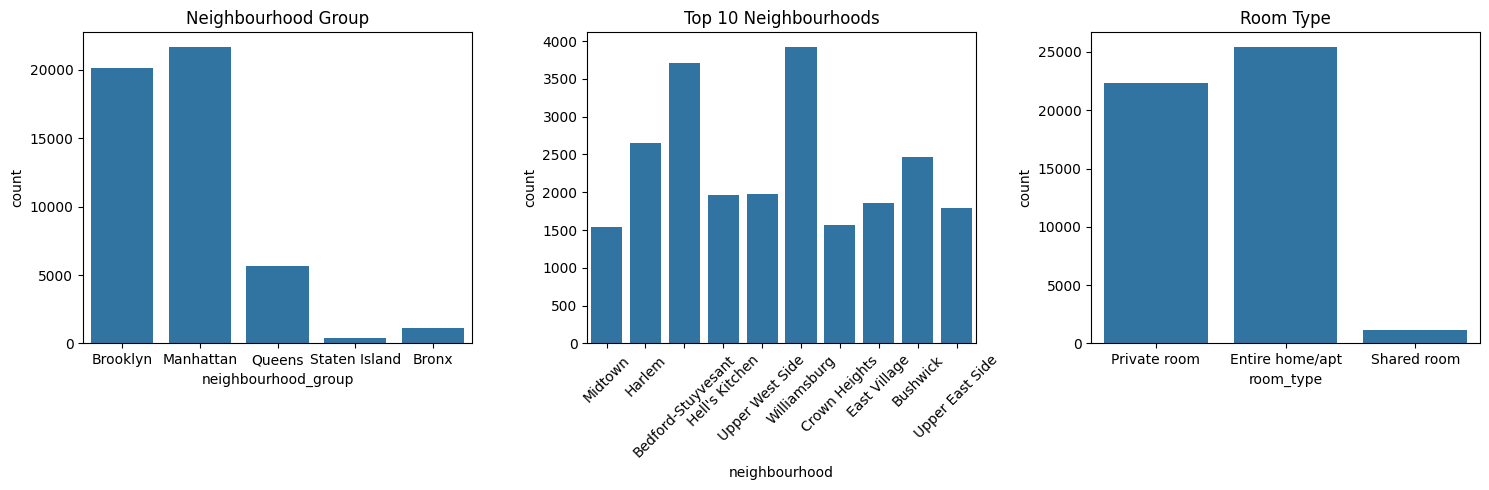

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axis[0], data=df, x="neighbourhood_group")
axis[0].set_title("Neighbourhood Group")

top_neigh = df['neighbourhood'].value_counts().nlargest(10).index
df_top = df[df['neighbourhood'].isin(top_neigh)]
sns.countplot(ax=axis[1], data=df_top, x="neighbourhood")
axis[1].set_title("Top 10 Neighbourhoods")
axis[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[2], data=df, x="room_type")
axis[2].set_title("Room Type")

plt.tight_layout()
plt.show()


Un histograma es una representación gráfica de la distribución de un conjunto de datos. Se utiliza además para comprender la frecuencia de los datos. Al observar un histograma, podemos entender si los datos están sesgados hacia un extremo, si son simétricos, si tienen muchos valores atípicos, etcétera. Con la representación de cada variable podemos determinar que:

- Neighbourhood_group:
Manhattan y Brooklyn concentran la mayoría de los alojamientos.
Queens, Bronx y Staten Island tienen mucha menor oferta en comparación.
Esto sugiere que la mayoría de los listados están en zonas más turísticas o céntricas.

- Neighbourhood (Top 10):
Williamsburg, Bedford-Stuyvesant y Harlem son los barrios con más alojamientos.
Hay una gran diversidad de barrios, pero unos pocos concentran la mayor parte de la oferta.
Esto puede reflejar zonas populares y con alta demanda.

- Room_type:
"Entire home/apt" y "Private room" dominan el mercado.
"Shared room" tiene una presencia mínima.
Los usuarios de Airbnb en NY parecen preferir privacidad total o parcial, en lugar de habitaciones compartidas.

#### Análisis sobre variables numéricas

Una **variable numérica** es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito. Una variable categórica numérica puede ser también una variable numérica (por ejemplo, para los sucesivos análisis, podemos tomar la clase `Survived` como numérica también para estudiar relaciones). Normalmente se representan utilizando un histograma y diagramas de caja, expuestos juntos. Antes de comenzar a graficar, debemos también identificar cuáles son las numéricas, que son price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365s:

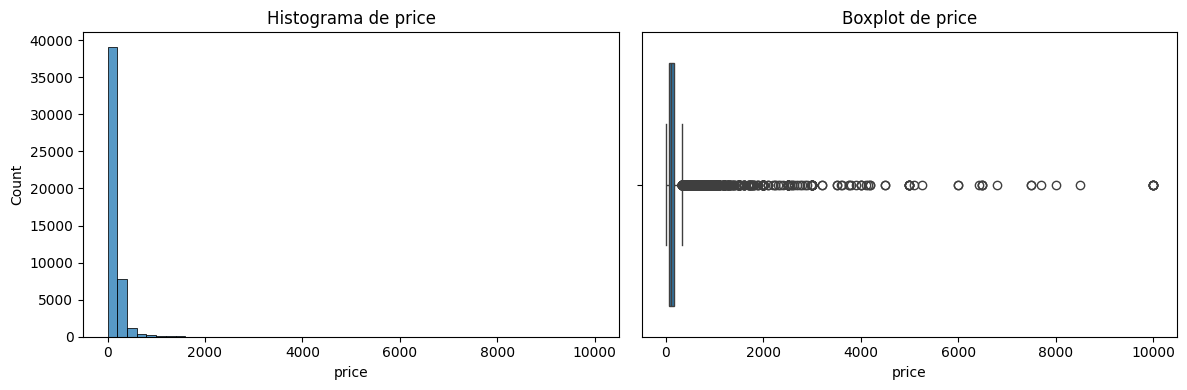

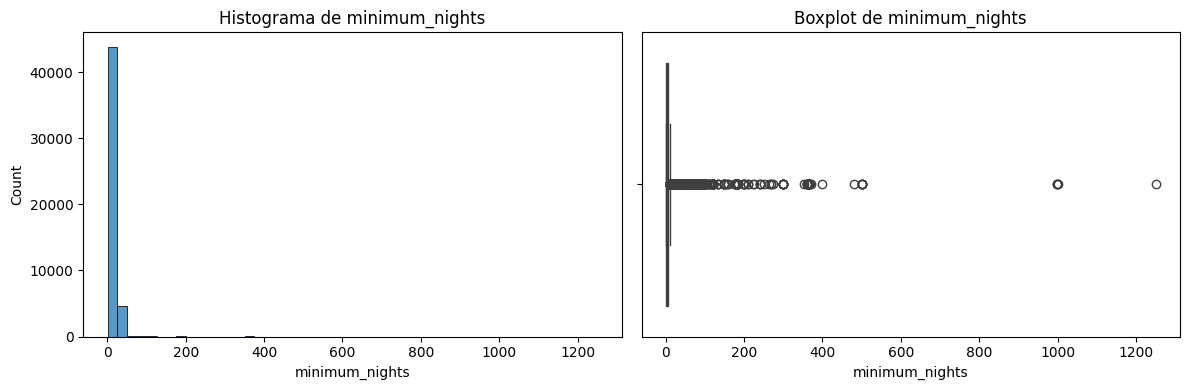

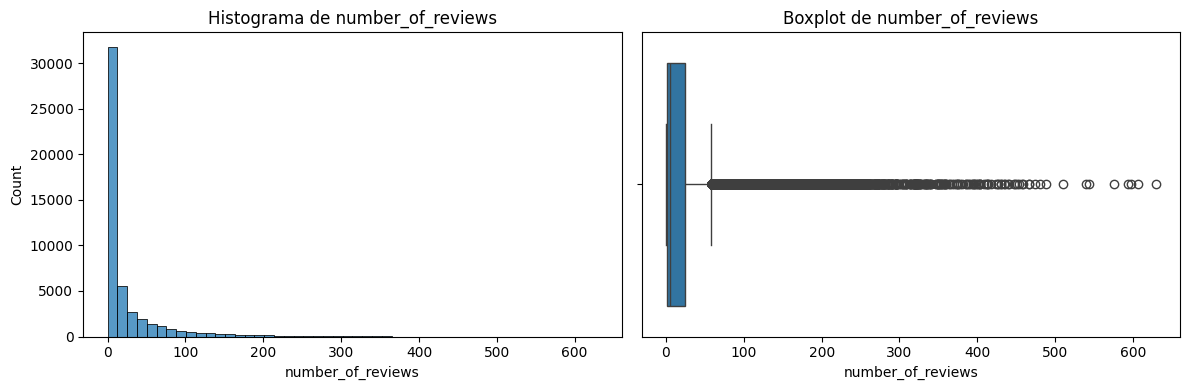

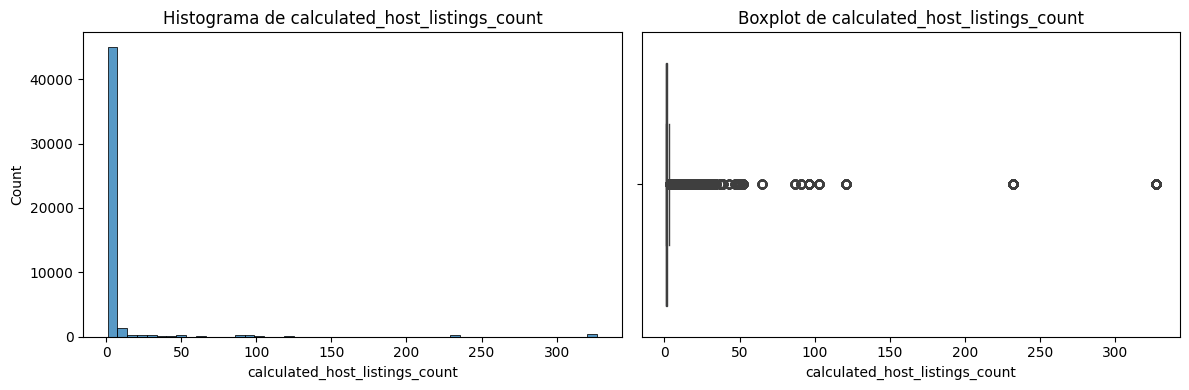

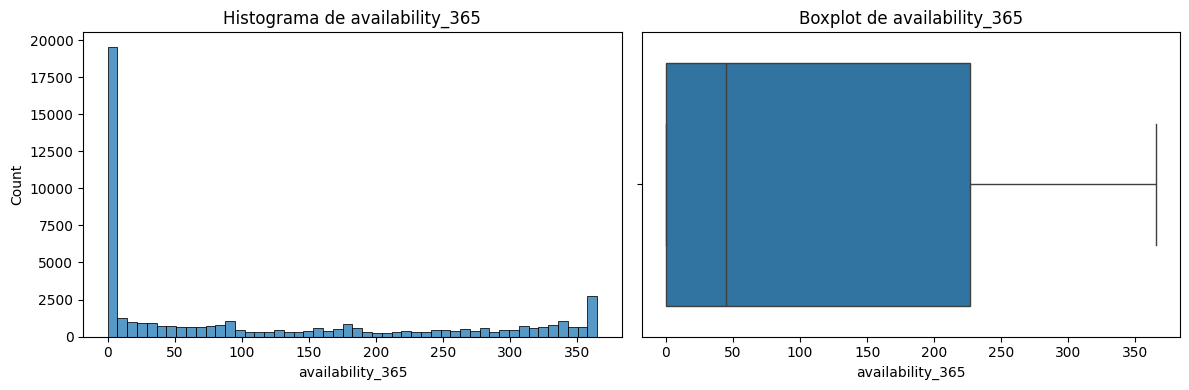

In [10]:

var_num = ['price', 'minimum_nights', 'number_of_reviews', 
                'calculated_host_listings_count', 'availability_365']

# Crear subplots
for var in var_num:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(data=df, x=var, bins=50, ax=axes[0])
    axes[0].set_title(f'Histograma de {var}')

    # Boxplot
    sns.boxplot(data=df, x=var, ax=axes[1])
    axes[1].set_title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()




### Paso 4: Análisis de variables multivariante

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no son críticos para la supervivencia de un pasajero. Por ejemplo, la variable `Cabin` tiene muchos valores nulos, y tendríamos que asegurar que no hay relación entre ella y la supervivencia antes de eliminarla, ya que quizá pudiera ser muy significativa e importante para el modelo y su presencia podría decantar la predicción.

#### Análisis numérico-numérico

Cuando las dos variables que se comparan tienen datos numéricos, se dice que el análisis es numérico-numérico. Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.


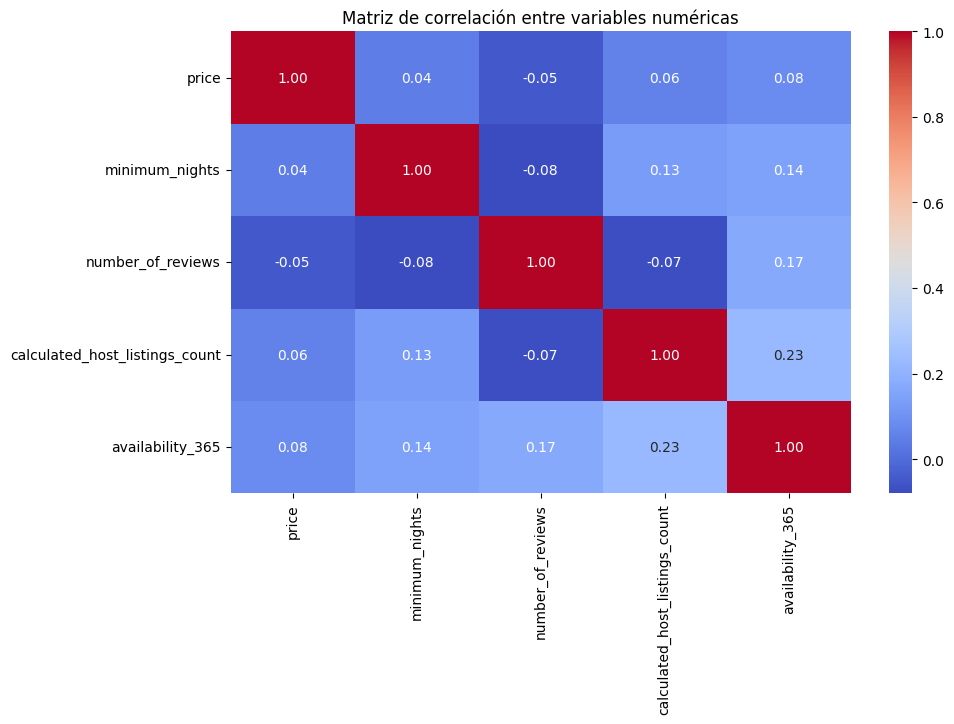

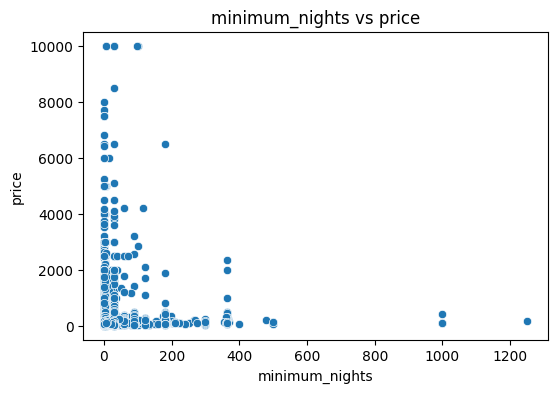

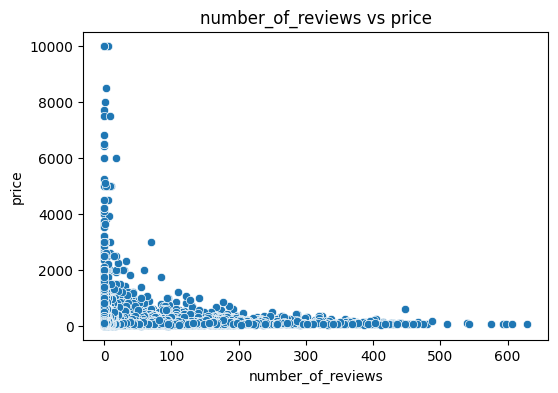

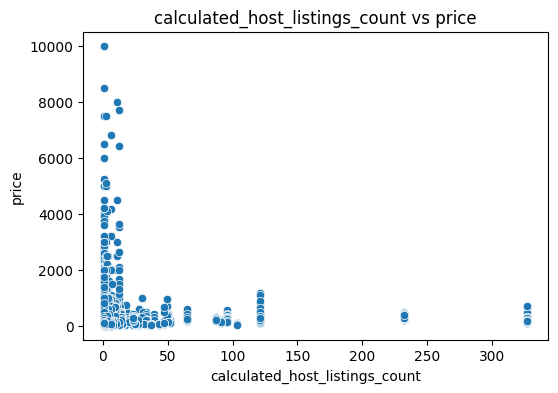

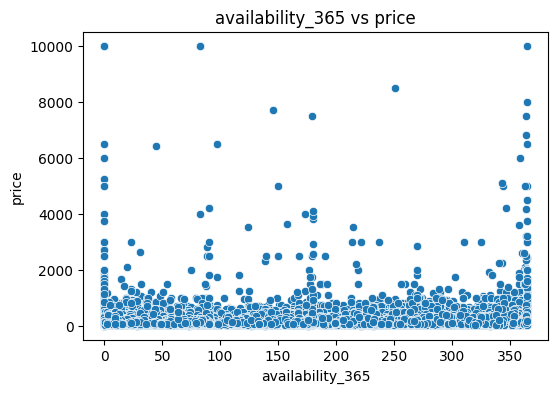

In [11]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 
                'calculated_host_listings_count', 'availability_365']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

numeric_vars = ['minimum_nights', 'number_of_reviews', 
                'calculated_host_listings_count', 'availability_365']

for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=var, y='price')
    plt.title(f'{var} vs price')
    plt.show()

Todas las correlaciones con price son muy bajas (entre 0.04 y 0.08), lo que indica:
No hay relación lineal fuerte entre price y las demás variables numéricas.

-minimum_nights vs price:
La mayoría de alojamientos tiene pocas noches mínimas.
No hay una relación clara: precios altos y bajos aparecen en todo el rango.
-number_of_reviews vs price:
La mayoría de alojamientos caros tienen pocas reviews.
Los alojamientos con muchas reviews suelen tener precios bajos-medios.
Posible patrón: precios más accesibles, mayor rotación de huéspedes.
-calculated_host_listings_count vs price:
La mayoría de los anfitriones tienen pocos alojamientos y precios variados.
Algunos pocos con muchos alojamientos tienden a mantener precios bajos.
Gestores con muchos listings pueden ofrecer tarifas más competitivas.
-availability_365 vs price:
Los precios están dispersos en todo el rango de disponibilidad.
Algunos alojamientos caros están disponibles todos los días, pero también hay muchos baratos.
No hay una tendencia clara.

#### Análisis categórico-categórico

Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas categóricas se utilizan histogramas y combinaciones.

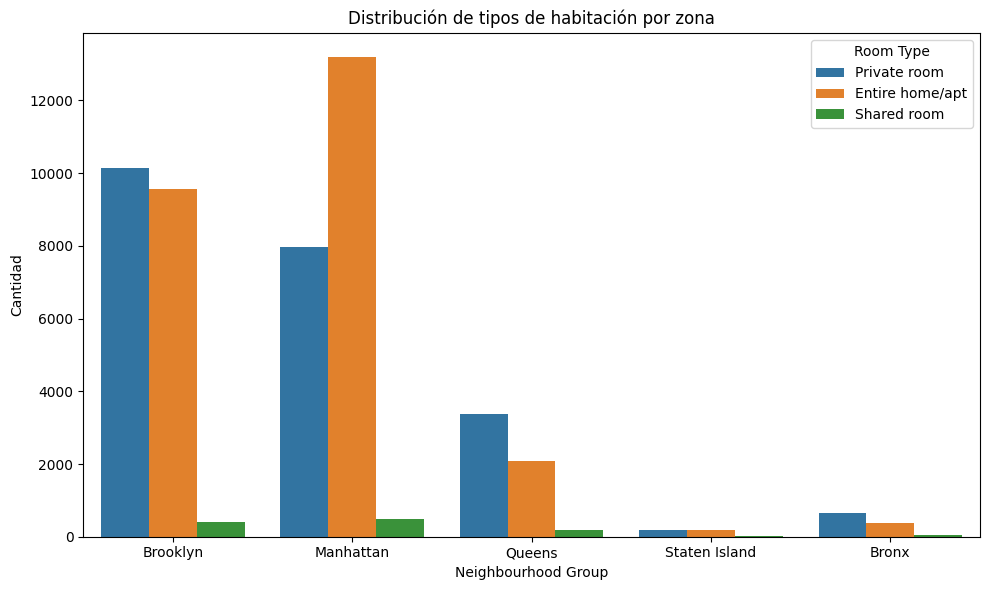

In [12]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Distribución de tipos de habitación por zona')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Cantidad')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


se puede determinar que el tipo de alojamiento está muy influenciado por la zona.
Manhattan es la zona más orientada a alojamientos completos, más turísticos.
Brooklyn y Queens tienen una oferta más variada, ideal para presupuestos distintos.


##### Combinaciones de la clase con varias predictoras

El análisis multivariante también permite combinar la clase con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

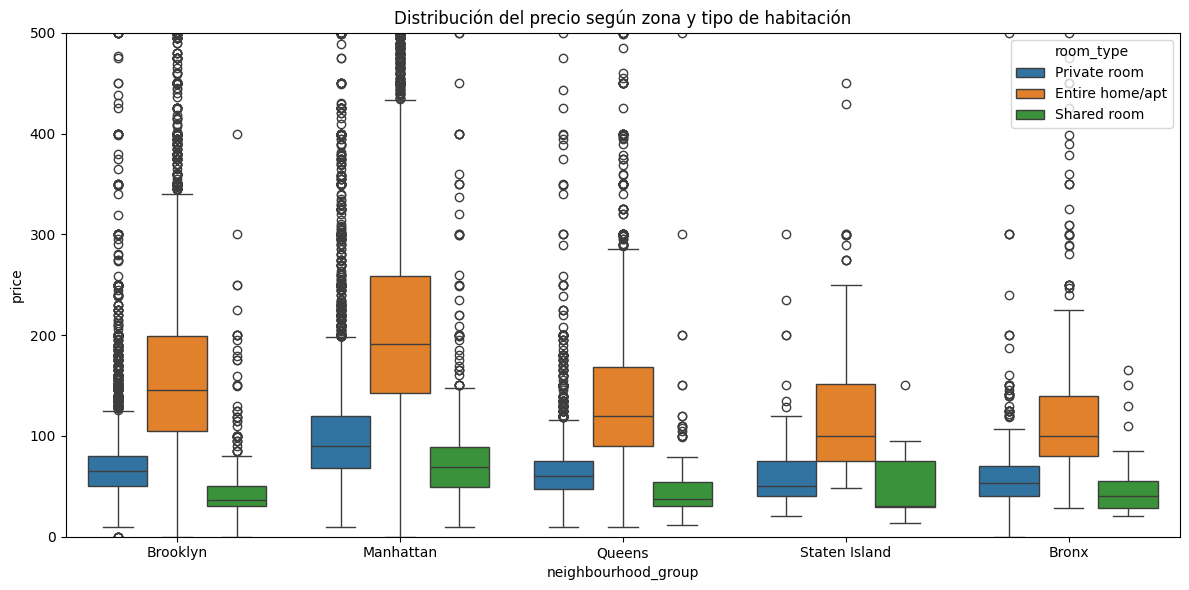

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Distribución del precio según zona y tipo de habitación')
plt.ylim(0, 500)  
plt.tight_layout()
plt.show()

Los apartamentos completos en Manhattan son los alojamientos más caros en Airbnb NY. En cambio, las habitaciones compartidas en Staten Island y el Bronx son las más baratas

##### Análisis de correlaciones

El objetivo del análisis de correlaciónes con datos categóricos-categóricos es descubrir patrones y dependencias entre variables, lo que ayuda a entender cómo interactúan dentro de un conjunto de datos. Este análisis es fundamental en diversos campos como ciencias sociales, investigación de mercado y epidemiología, donde los datos categóricos a menudo representan atributos clave de interés.

Este análisis tiene como objetivo determinar si y cómo las categorías de una variable están relacionadas con las categorías de otra.

In [14]:
# EN EL EDA HACÉIS:

df["room_type_n"] = pd.factorize(df["room_type"])[0]

room_type_rules = {row["room_type"]: row["room_type_n"] for _, row in df[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

import json
with open("room_type_rules.json", "w") as f:
    json.dump(room_type_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:

with open("room_type_rules.json", "r") as f:
    room_type_rules = json.load(f)

df["room_type_n"] = df["room_type"].apply(lambda x: room_type_rules[x])


In [15]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,2


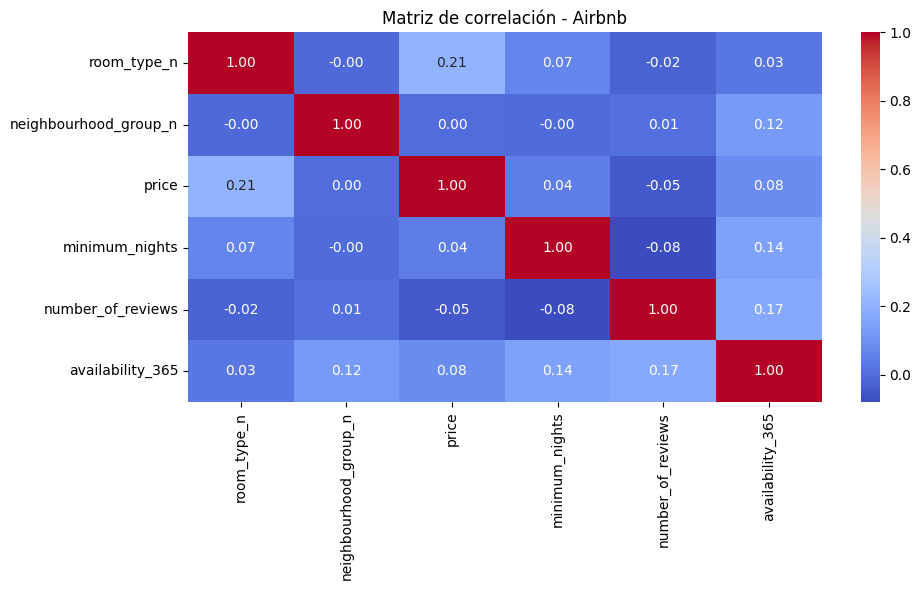

In [16]:
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]

neigh_group_rules = {
    row["neighbourhood_group"]: row["neighbourhood_group_n"]
    for _, row in df[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()
}

# Guardar el diccionario
import json
with open("neigh_group_rules.json", "w") as f:
    json.dump(neigh_group_rules, f)


cols = [
    "room_type_n",             # ya la tienes
    "neighbourhood_group_n",   # recién codificada
    "price",
    "minimum_nights",
    "number_of_reviews",
    "availability_365"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación - Airbnb")
plt.tight_layout()
plt.show()

In [17]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,2,1


In [18]:
df["room_type"][1:]

1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
5        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48894, dtype: object

In [19]:
pd.factorize(df["room_type"][1:])[0]

array([0, 1, 0, ..., 0, 2, 1], shape=(48894,))

In [20]:
list(set(df["room_type"]))

['Shared room', 'Entire home/apt', 'Private room']

No hay correlaciones fuertes entre las variables numéricas, pero room_type_n es la única con una correlación algo significativa con price, lo que refuerza su valor como predictora. Las demás aportan valor pero no de forma lineal.

Finalmente, para cerrar el estudio multivariante queda analizar la relación entre las variables categóricas y numéricas.

#### Análisis numérico-categórico (completo)

Este es el análisis a mayor detalle que podemos llevar a cabo. Para ello, simplemente hemos de calcular las correlaciones entre las variables, ya que es el mayor indicativo sobre las relaciones. Así, una vez comprobemos que existe alguna relación, podremos profundizar en el estudio. Otro elemento que nos puede ser de mucha ayuda es obtener las relaciones dos a dos entre todos los datos del dataset. Esto es, en parte, redundante porque hay muchas cosas que ya hemos calculado antes y por eso es opcional.

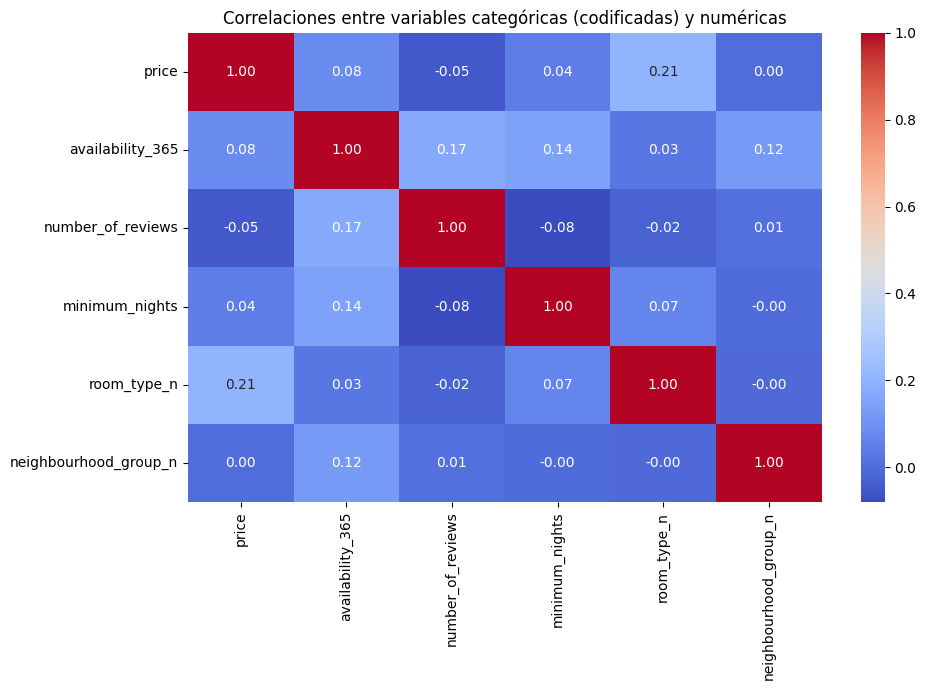

In [21]:
cols = [
    "price",
    "availability_365",
    "number_of_reviews",
    "minimum_nights",
    "room_type_n",
    "neighbourhood_group_n"
]

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlaciones entre variables categóricas (codificadas) y numéricas")
plt.tight_layout()
plt.show()

Existe una relación positiva entre el tipo de habitación (room_type_n) y el precio (price), con una correlación de 0.21, lo cual indica que los alojamientos con mayor categoría tienden a tener precios más altos, algo que tiene sentido.

También se observa una correlación moderada entre la disponibilidad anual (availability_365) y el número de reseñas (number_of_reviews), con un valor de 0.17, lo que sugiere que los alojamientos disponibles durante más días del año suelen recibir más reviews.
Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

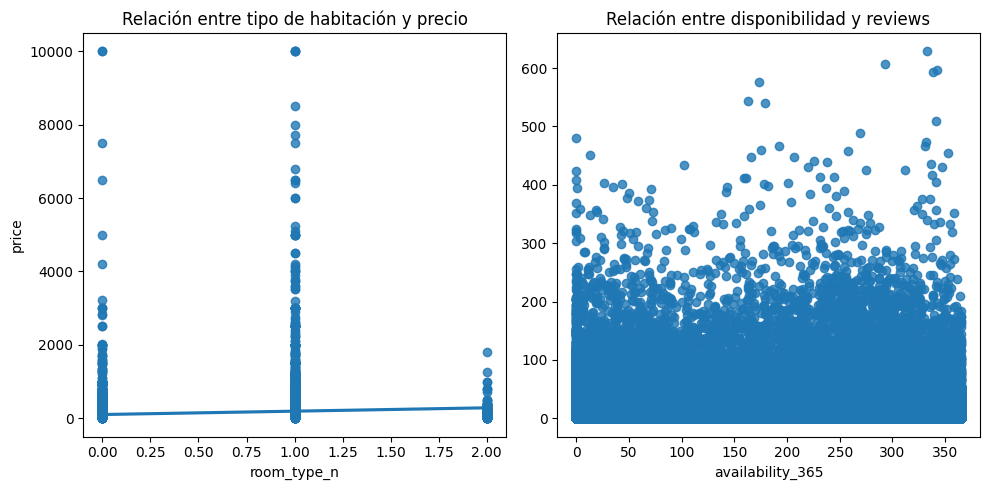

In [22]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.regplot(ax=axis[0], data=df, x="room_type_n", y="price")
axis[0].set_title("Relación entre tipo de habitación y precio")


sns.regplot(ax=axis[1], data=df, x="availability_365", y="number_of_reviews")
axis[1].set_title("Relación entre disponibilidad y reviews")
axis[1].set(ylabel=None)

plt.tight_layout()
plt.show()

Las visualizaciones confirman que el tipo de alojamiento afecta significativamente al precio y que una mayor disponibilidad se asocia con un mayor número de reseñas. Ambas relaciones se alinean con los resultados obtenidos en el análisis de correlaciones.

Una vez calculada la correlación podemos dibujar el `pairplot` (es un paso opcional):

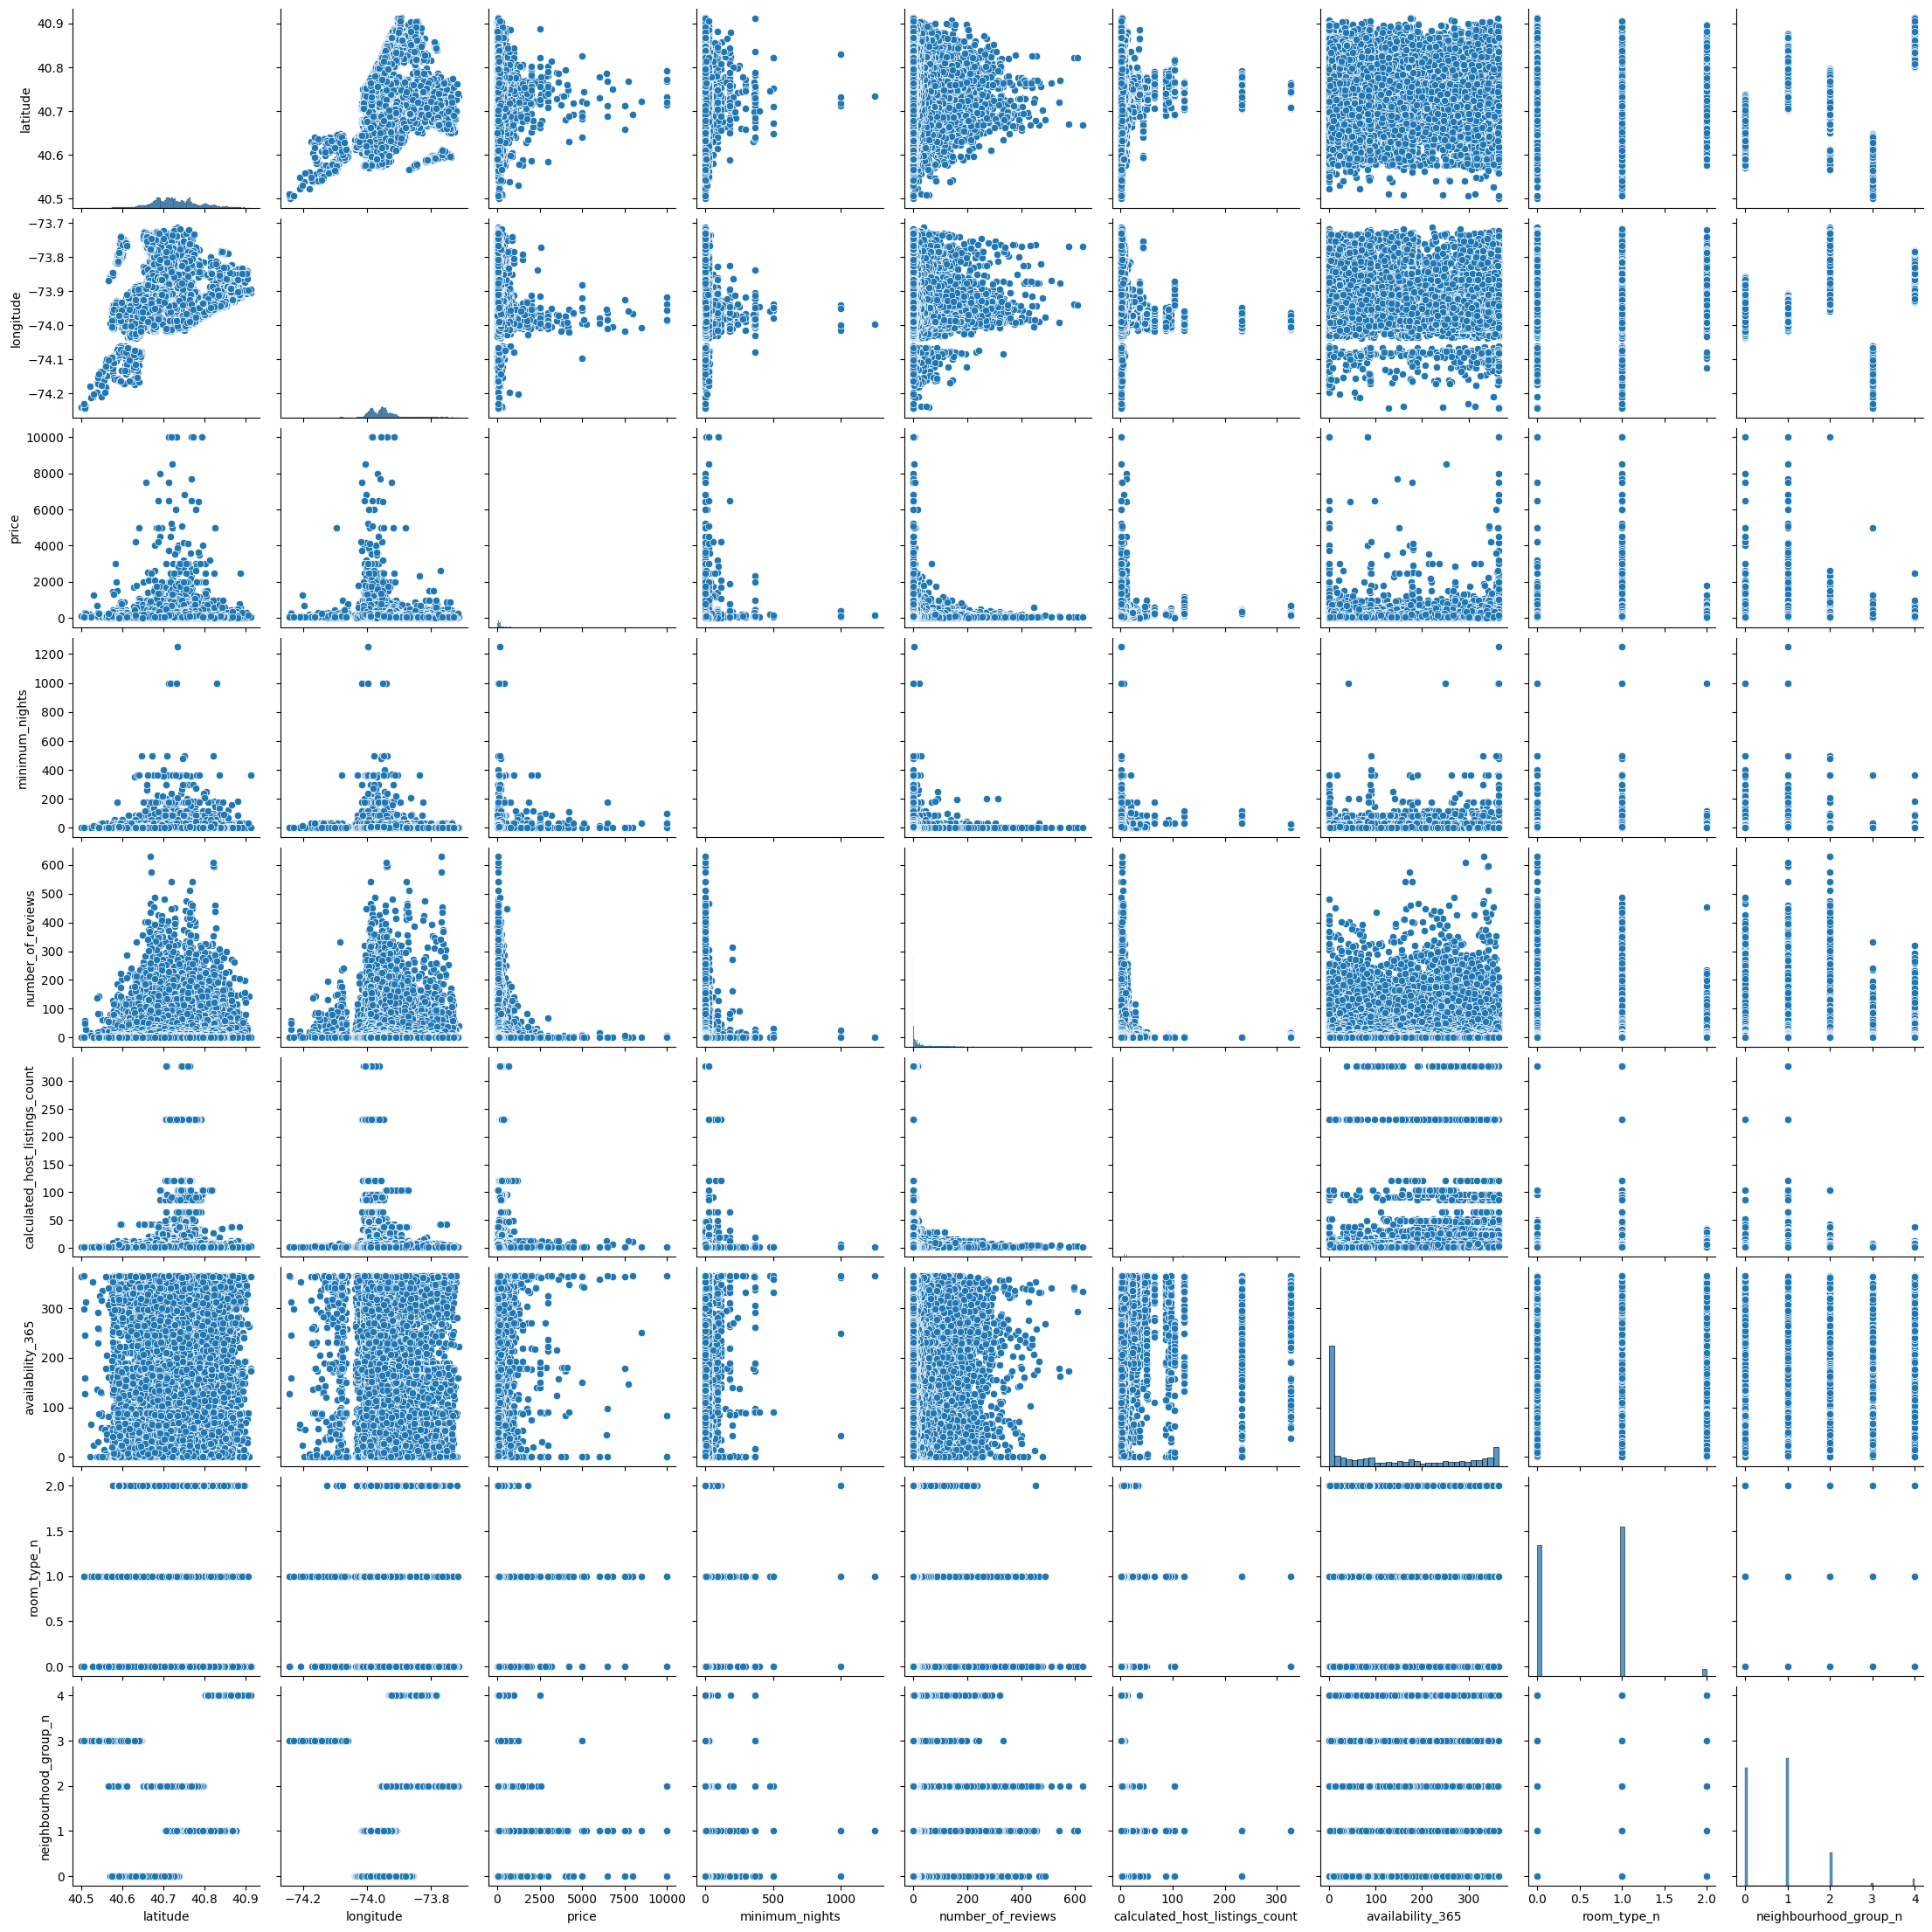

In [23]:
sns.pairplot(data = df)

## FIN DEL DÍA 1

¡Ahora, trabajemos y practiquemos la lección de hoy para afianzar lo aprendido!

## DÍA 2

### Paso 5: Ingeniería de características

La **ingeniería de características** (*feature engineering*) es un proceso que implica la creación de nuevas características (o variables) a partir de las existentes para mejorar el rendimiento del modelo. Esto puede implicar una variedad de técnicas como la normalización, la transformación de los datos, etcétera. El objetivo es mejorar la precisión del modelo y/o reducir la complejidad del mismo, facilitando así su interpretación.

En los pasos previos hemos empezado a trabajar con los datos eliminando duplicados, contabilizando los valores nulos e, incluso, para calcular correlaciones, transformando `Sex` y `Embarked` en categorías numéricas. Si bien esto podríamos haberlo hecho en este paso, ya que forma parte de la ingeniería de características, normalmente suele hacerse antes de analizar las variables, separando este proceso en uno previo y este que vamos a ver a continuación.

#### Análisis de outliers

Un **valor atípico** (*outlier*) es un punto de datos que se desvía significativamente de los demás. Es un valor que es notablemente diferente de lo que sería de esperar dada la tendencia general de los datos. Estos outliers pueden ser causados por errores en la recolección de datos, variaciones naturales en los datos, o pueden ser indicativos de algo significativo, como una anomalía o evento extraordinario.

El **análisis descriptivo** es una poderosa herramienta para caracterizar el conjunto de datos: la media, desviación y los cuartiles nos brindan una poderosa información sobre cada variable. La función `describe()` de un DataFrame nos ayuda a calcular en unos tiempos muy reducidos todos estos valores.

In [24]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000


Existen valores atípicos claros en price y minimum_nights que deben ser filtrados o tratados.


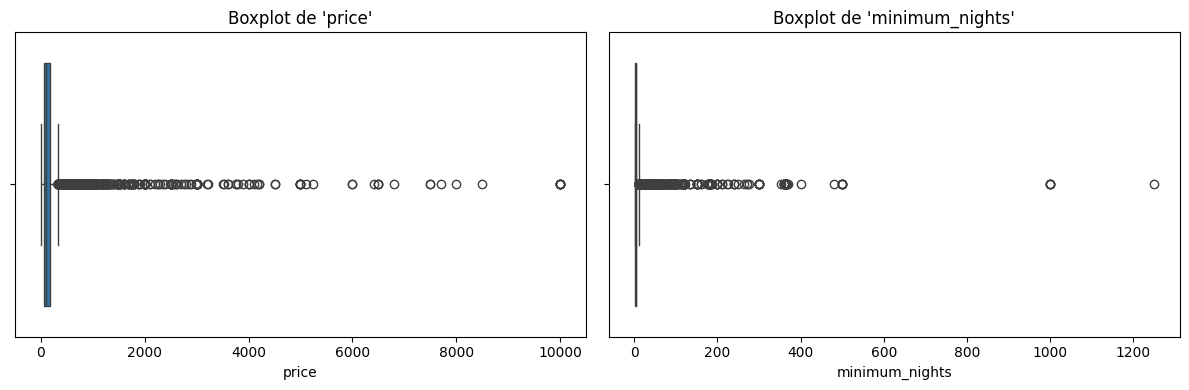

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='price')
plt.title("Boxplot de 'price'")



plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='minimum_nights')
plt.title("Boxplot de 'minimum_nights'")


plt.tight_layout()
plt.show()

Podemos determinar fácilmente que las variables afectadas por outliers son `Age`, `SibSp`, `Parch` y `Fare`. En el caso anterior sobre el billete del crucero (columna `Fare`) parece que la tarifa del billete de 512 dólares no es muy común. Deberíamos establecer algunos límites superior e inferior para determinar si un punto de datos debe considerarse o no un valor atípico.

Para lidiar con ellos hay muchas técnicas, y puedes encontrar más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-outliers.es.md), pero que se resume en los siguientes puntos:

- Mantenerlos. En ciertos problemas de Machine Learning, un valor atípico puede decantar la predicción hacia una clase u otra (esto es muy común, por ejemplo, para detectar riesgos). Por lo tanto, podría ser una política que en ciertos casos tuviera sentido. Normalmente no se utiliza.
- Eliminarlos. Aquellas instancias que cuenten con características atípicas se eliminan del conjunto de datos. Sin embargo, si hay muchos valores atípicos, esta estrategia puede causar que se pierda gran parte de la información disponible.
- Reemplazarlos. Si no queremos eliminar instancias completas por la presencia de outliers en una de sus características, podemos reemplazarlos tomándolos en cuenta como valores faltantes y reutilizando la política.

Por ejemplo, si queremos aplicar el segundo punto de los anteriores para el caso de la columna `Fare`:

In [29]:
import json

df_con_outliers = df.copy()
df_sin_outliers = df.copy()

def replace_outliers_from_column(column, df):
    column_stats = df[column].describe()
    iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * iqr
    lower_limit = column_stats["25%"] - 1.5 * iqr
    if lower_limit < 0:
        lower_limit = df[column].min()
    
    df[column] = df[column].apply(lambda x: min(x, upper_limit))
    df[column] = df[column].apply(lambda x: max(x, lower_limit))
    return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["price", "minimum_nights"]:
    df_sin_outliers, limits = replace_outliers_from_column(column, df_sin_outliers)
    outliers_dict[column] = limits

# Guardar los límites usados
# with open("outliers_replacement.json", "w") as f:
#     json.dump(outliers_dict, f)

outliers_dict

outliers_dict_clean = {
    k: [float(v[0]), float(v[1])] for k, v in outliers_dict.items()
}
print(outliers_dict_clean)


{'price': [0.0, 334.0], 'minimum_nights': [1.0, 11.0]}


In [30]:
df_sin_outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,6,365,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2,355,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,1,365,0,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,1,194,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0,2,9,0,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0,2,36,0,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0,1,27,1,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0,6,2,2,1


En este caso vemos que todos ellos sobrevivieron, quizá sí que hay un impacto real sobre el precio de billete tan elevado y la supervivencia final. Por lo tanto, sumado al análisis univariante anterior, existe una implicación entre el precio del billete y el resultado final de supervivencia, por lo que decidimos que **mantenemos los valores atípicos**.

#### Análisis de valores faltantes

Un **valor faltante** (*missing value*) es un espacio que no tiene valor asignado en la observación de una variable específica. Este tipo de valores son bastante comunes y pueden surgir por muchas razones. Por ejemplo, podría haber un error en la recopilación de datos, alguien podría haberse negado a responder una pregunta en una encuesta, o simplemente podría ser que cierta información no esté disponible o no sea aplicable.

La función `isnull()` es una poderosa herramienta para obtener esta información:

In [ ]:
df_con_outliers.isnull().sum().sort_values(ascending=False)
df_sin_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
dtype: int64

Además, podemos dividir ese resultado por la longitud de nuestro DataFrame (número de filas) para obtener el porcentaje de valores faltantes en cada columna. Los valores faltantes generalmente se representan en forma de `Nan`, `Null` (nulo) o `None` (ninguno) en el conjunto de datos:

In [35]:
df.isnull().sum().sort_values(ascending=False) / len(df)

neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
room_type_n                       0.0
neighbourhood_group_n             0.0
dtype: float64

El conjunto de datos no contiene valores faltantes. Todas las columnas tienen un 0% de valores nulos, por lo que no es necesario aplicar estrategias de imputación o eliminación.



#### Inferencia de nuevas características

Otro uso típico en esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes. 
Si combinamos number_of_reviews y  availability_365 , cramos una variable que refleje como de popular es un alojamiento.

In [48]:
df_con_outliers["popularity"] = df_con_outliers["number_of_reviews"] / (df_con_outliers["availability_365"] + 1)
df_sin_outliers["popularity"] = df_sin_outliers["number_of_reviews"] / (df_sin_outliers["availability_365"] + 1)
df_con_outliers.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,popularity
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0.024590
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,0.126404
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,1,0.000000
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0,1.384615
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,9.000000


De esta forma podemos simplificar el número de variables y trazar nuevas relaciones con la clase predictora.

#### Escalado de valores

El **escalado de valores** (*feature scaling*) es un paso crucial en el preprocesamiento de datos para muchos algoritmos de Machine Learning. Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí. El escalado normalmente implica la normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1. Otra técnica común es el escalado mínimo-máximo, que transforma los datos para que todos los valores estén entre 0 y 1.

Antes de escalar los valores, debemos dividir convenientemente el conjunto en train y test, lo que prevendrá que los datos de entrenamiento no se contaminen con los datos del conjunto de pruebas. El escalador (*scaler*) será el encargado de escalar las variables en función del conjunto de entrenamiento.

In [53]:
from sklearn.model_selection import train_test_split

num_variables = ["price", "minimum_nights", "number_of_reviews", "availability_365", "popularity"]


# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = df_con_outliers[num_variables]
X_sin_outliers = df_sin_outliers[num_variables]
y = df_con_outliers["price"]


X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(
    X_con_outliers, y, test_size=0.2, random_state=42
)

X_train_sin_outliers, X_test_sin_outliers = train_test_split(
    X_sin_outliers, test_size=0.2, random_state=42
)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("../data/processed/y_train.xlsx", index=False)
y_test.to_excel("../data/processed/y_test.xlsx", index=False)


X_train_con_outliers.head()

,price,minimum_nights,number_of_reviews,availability_365,popularity
32645,295,3,11,1,5.500000
23615,70,2,2,0,2.000000
31183,58,2,0,0,0.000000
29260,75,3,87,267,0.324627
7275,38,5,13,0,13.000000


> NOTA: Sólo se deben escalar las variables predictoras, nunca la objetivo.

A continuación detallaremos cómo podemos aplicar cada una de ellas, pero recordemos que depende mucho del modelo que vayamos a querer entrenar:

##### Normalización

In [54]:
from sklearn.preprocessing import StandardScaler
import pickle

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("normalizador_con_outliers.pkl", "wb") as f:
    pickle.dump(normalizador_con_outliers, f)

X_train_con_outliers_norm = pd.DataFrame(
    normalizador_con_outliers.transform(X_train_con_outliers),
    index=X_train_con_outliers.index,
    columns=num_variables
)

X_test_con_outliers_norm = pd.DataFrame(
    normalizador_con_outliers.transform(X_test_con_outliers),
    index=X_test_con_outliers.index,
    columns=num_variables
)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("normalizador_sin_outliers.pkl", "wb") as f:
    pickle.dump(normalizador_sin_outliers, f)

X_train_sin_outliers_norm = pd.DataFrame(
    normalizador_sin_outliers.transform(X_train_sin_outliers),
    index=X_train_sin_outliers.index,
    columns=num_variables
)

X_test_sin_outliers_norm = pd.DataFrame(
    normalizador_sin_outliers.transform(X_test_sin_outliers),
    index=X_test_sin_outliers.index,
    columns=num_variables
)

X_train_con_outliers_norm.to_excel("X_train_con_outliers_norm.xlsx", index=False)
X_test_con_outliers_norm.to_excel("X_test_con_outliers_norm.xlsx", index=False)
X_train_sin_outliers_norm.to_excel("X_train_sin_outliers_norm.xlsx", index=False)
X_test_sin_outliers_norm.to_excel("X_test_sin_outliers_norm.xlsx", index=False)


X_train_con_outliers_norm.head()

,price,minimum_nights,number_of_reviews,availability_365,popularity
32645,0.571775,-0.193025,-0.277198,-0.852862,0.175171
23615,-0.339028,-0.239596,-0.479451,-0.860447,-0.103834
31183,-0.387604,-0.239596,-0.524396,-0.860447,-0.263264
29260,-0.318787,-0.193025,1.430714,1.164663,-0.237387
7275,-0.468564,-0.099884,-0.232253,-0.860447,0.773036


##### Escalado Mínimo-Máximo

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("scaler_con_outliers.pkl", "wb") as file:
    pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = pd.DataFrame(
    scaler_con_outliers.transform(X_train_con_outliers),
    index=X_train_con_outliers.index,
    columns=num_variables
)

X_test_con_outliers_scal = pd.DataFrame(
    scaler_con_outliers.transform(X_test_con_outliers),
    index=X_test_con_outliers.index,
    columns=num_variables
)

X_train_con_outliers_scal.to_excel("X_train_con_outliers_scal.xlsx", index=False)
X_test_con_outliers_scal.to_excel("X_test_con_outliers_scal.xlsx", index=False)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("scaler_sin_outliers.pkl", "wb") as file:
    pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = pd.DataFrame(
    scaler_sin_outliers.transform(X_train_sin_outliers),
    index=X_train_sin_outliers.index,
    columns=num_variables
)

X_test_sin_outliers_scal = pd.DataFrame(
    scaler_sin_outliers.transform(X_test_sin_outliers),
    index=X_test_sin_outliers.index,
    columns=num_variables
)

X_train_sin_outliers_scal.to_excel("X_train_sin_outliers_scal.xlsx", index=False)
X_test_sin_outliers_scal.to_excel("X_test_sin_outliers_scal.xlsx", index=False)


X_train_con_outliers_scal.head()

,price,minimum_nights,number_of_reviews,availability_365,popularity
32645,0.0295,0.001601,0.017488,0.002740,0.011458
23615,0.0070,0.000801,0.003180,0.000000,0.004167
31183,0.0058,0.000801,0.000000,0.000000,0.000000
29260,0.0075,0.001601,0.138315,0.731507,0.000676
7275,0.0038,0.003203,0.020668,0.000000,0.027083


> NOTA: En este paso debemos asegurar que todas nuestras variables son numéricas, y, si no, como hemos visto en los pasos del principio, deberíamos transformarlas, como hemos hecho con `Sex` y `Embarked`.

### Paso 6: Selección de características

La **selección de características** (*feature selection*) es un proceso que implica seleccionar las características (variables) más relevantes de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning, desechando el resto.

Existen varias razones para incluirlo en nuestro análisis exploratorio:

1. Simplificar el modelo para que sea más fácil de entender e interpretar.
2. Reducir el tiempo de entrenamiento del modelo.
3. Evitar el sobre ajuste al reducir la dimensionalidad del modelo y minimizar el ruido y las correlaciones innecesarias.
4. Mejorar el rendimiento del modelo al eliminar las características irrelevantes.


La librería `sklearn` contiene gran parte de las mejores alternativas para llevarla a cabo. Una de las herramientas que más se utilizan para realizar procesos de selección de características rápidos y con buenos resultados es `SelectKBest`. Esta función selecciona las `k` mejores características de nuestro conjunto de datos basándose en una función de un test estadístico. Este test estadístico normalmente es un ANOVA o un Chi-Cuadrado:

In [66]:
from sklearn.feature_selection import SelectKBest, f_regression
import json

X_features = X_train_con_outliers_scal.drop("price", axis=1)

selection_model = SelectKBest(score_func=f_regression, k=3)
selection_model.fit(X_features, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_features), 
                           columns=X_features.columns[ix])

X_test_features = X_test_con_outliers_scal.drop("price", axis=1)
X_test_sel = pd.DataFrame(selection_model.transform(X_test_features), 
                          columns=X_test_features.columns[ix])

with open("feature_selection_k_3.json", "w") as f:
    json.dump(list(X_train_sel.columns), f)


X_train_sel.head()



,minimum_nights,number_of_reviews,availability_365
0,0.001601,0.017488,0.002740
1,0.000801,0.003180,0.000000
2,0.000801,0.000000,0.000000
3,0.001601,0.138315,0.731507
4,0.003203,0.020668,0.000000


In [67]:
X_test_sel.head()

,minimum_nights,number_of_reviews,availability_365
0,0.001601,0.098569,0.517808
1,0.016013,0.000000,0.200000
2,0.000801,0.027027,0.000000
3,0.000801,0.007949,0.745205
4,0.000801,0.047695,0.082192


In [68]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [70]:
X_train_sel.to_csv("clean_airbnb_train.csv", index=False)
X_test_sel.to_csv("clean_airbnb_test.csv", index=False)
